In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

# Data Exploration - Q1

In [144]:
# Solution 1
Q1 = pd.read_excel("First set of data.xlsx", sheet_name = "Q1")

"""
# Solution 2
sheets = pd.ExcelFile("First set of data.xlsx")
sheet_1 = sheets.parse(0)
"""

'\n# Solution 2\nsheets = pd.ExcelFile("First set of data.xlsx")\nsheet_1 = sheets.parse(0)\n'

## Check statistics of each variable

In [145]:
Q1.describe()

,S1,S2,S3
count,135.000000,135.000000,134.000000
mean,383.548148,306.044444,349.716418
std,54.910880,91.372117,49.351678
min,241.000000,-270.000000,211.000000
25%,349.500000,256.500000,314.250000
50%,378.000000,341.000000,351.500000
75%,424.500000,370.000000,387.500000
max,505.000000,394.000000,500.000000


## Check distribution of each variable

This dataset has 135 observations with 3 features.


array([[<AxesSubplot:title={'center':'S1'}>,
        <AxesSubplot:title={'center':'S2'}>,
        <AxesSubplot:title={'center':'S3'}>]], dtype=object)

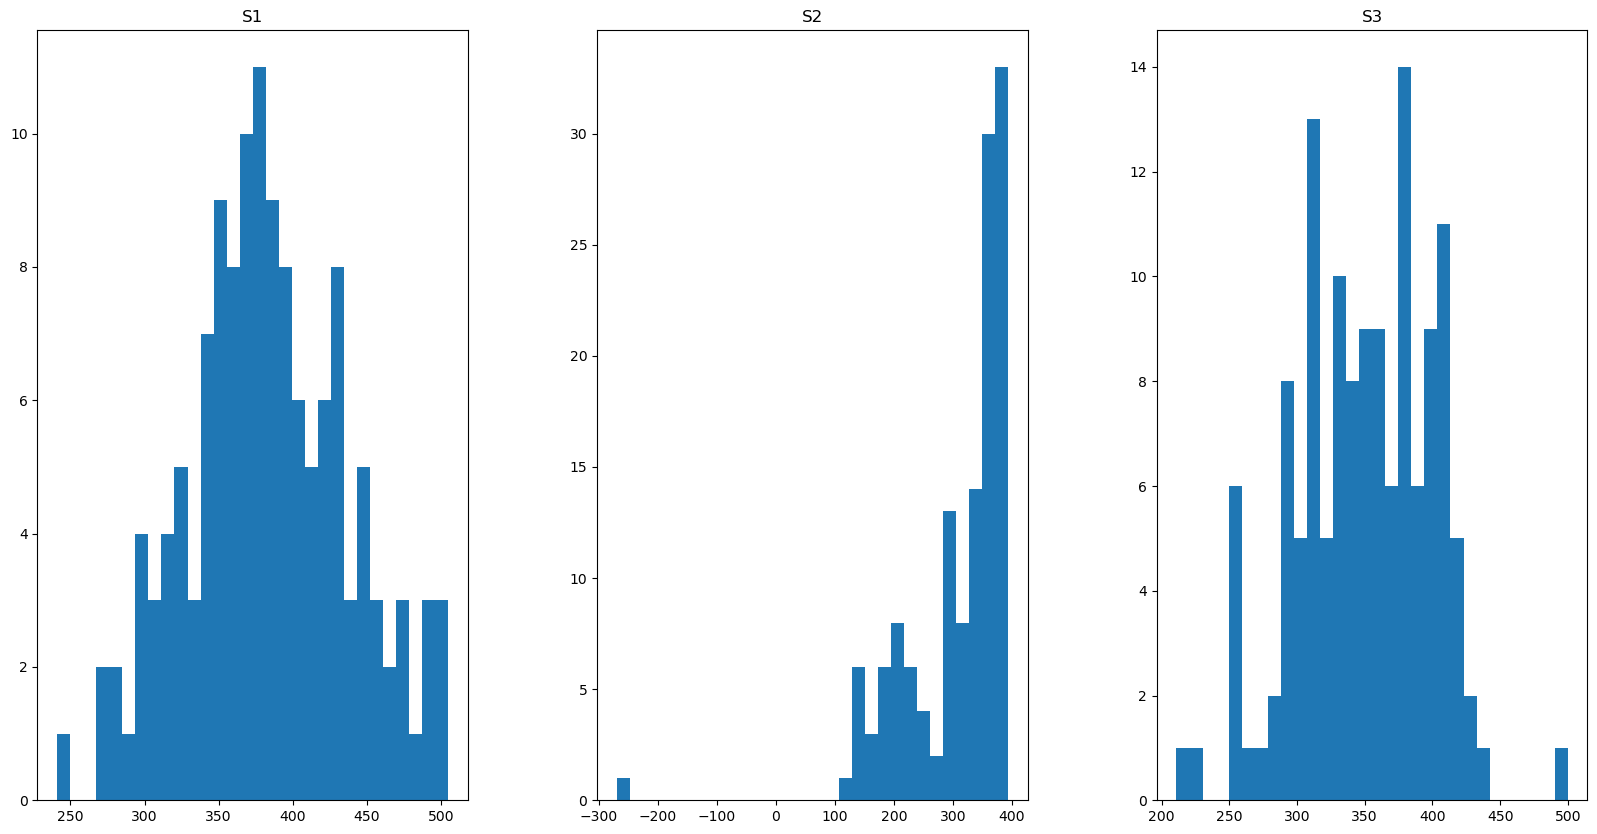

In [146]:
print('This dataset has {} observations with {} features.'.format(Q1.shape[0], Q1.shape[1]))
Q1.hist(figsize=(20, 10), grid=False, layout=(1, 3), bins=30)

## Check types of varibales

In [147]:
Q1.dtypes

S1      int64
S2      int64
S3    float64
dtype: object

## Checking missing values and see distribution of each variable

In [148]:
missing_values = Q1.isnull().sum()
percentage_missing_values = (missing_values/len(Q1))*100
Check_missing_values = pd.concat([missing_values, percentage_missing_values], axis=1, keys= ['Missing values', '% Missing'])
print(Check_missing_values)

    Missing values  % Missing
S1               0   0.000000
S2               0   0.000000
S3               1   0.740741


## Imputation of missing values

In [149]:
# Find index of null values in dataframe
print(Q1[Q1['S3'].isnull()].index.tolist())

# Solution 1
m = Q1["S3"].mean()
Q1["S3"].fillna(m, inplace = True)

# Solution 2
# df = df.interpolate()

[120]


## Outliers Detection

In [150]:
Q1_ = Q1.quantile(0.25)
Q3_ = Q1.quantile(0.75)

IQR = Q3_ - Q1_
lower_bound = Q1_ - 1.5*IQR
upper_bound = Q3_ + 1.5*IQR

outliers_S1 = Q1[(Q1['S1'] < lower_bound['S1']) | (Q1['S1'] > upper_bound['S1'])]
outliers_S2 = Q1[(Q1['S2'] < lower_bound['S2']) | (Q1['S2'] > upper_bound['S2'])]
outliers_S3 = Q1[(Q1['S3'] < lower_bound['S3']) | (Q1['S3'] > upper_bound['S3'])]

print(pd.concat([lower_bound, upper_bound], axis=1, keys= ['Lower Bound', 'Upper Bound']))

print(pd.concat([outliers_S1, outliers_S2, outliers_S3], axis=0, keys= ['outliers_S1', 'outliers_S3', "outliers_S3"]))

    Lower Bound  Upper Bound
S1       237.00       537.00
S2        86.25       540.25
S3       205.75       495.75
                  S1   S2          S3
outliers_S3 120  350 -270  349.716418
            11   350  300  500.000000


## Boxplot

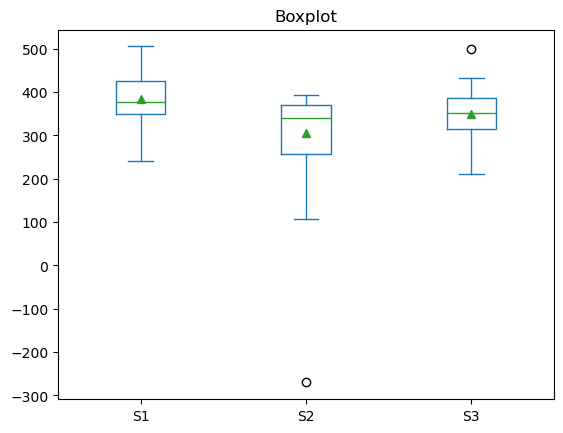

In [30]:
ax = df.plot(kind = "box", title = "Boxplot", showmeans=True)

## Violin plot

<AxesSubplot:>

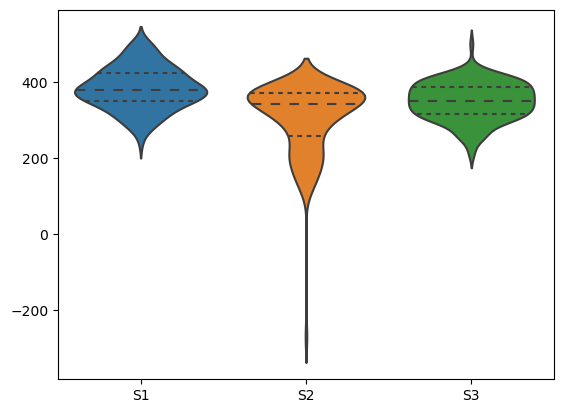

In [31]:
sns.violinplot(df, inner = "quartile")

## Pairplot

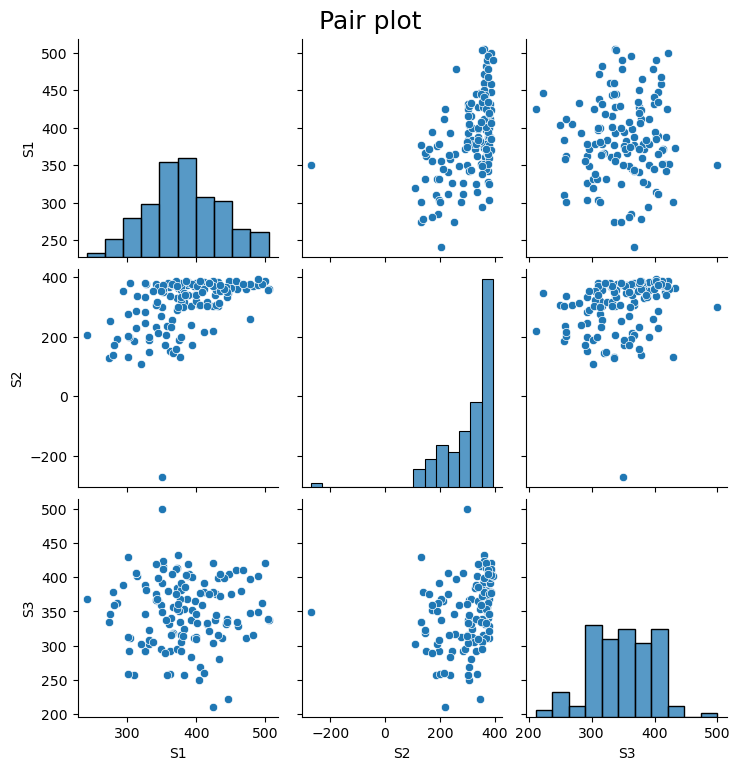

In [32]:
pairplot = sns.pairplot(df)
pairplot.fig.suptitle('Pair plot', fontsize=18, y=1.02)
plt.show()

## Heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

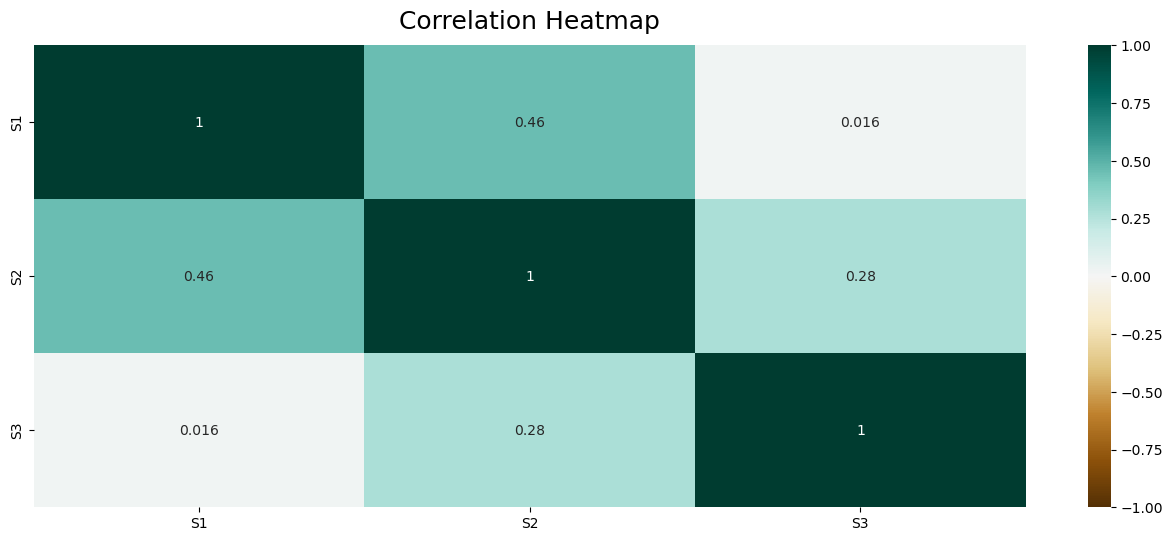

In [33]:
# %% Heatmap
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(),vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 18}, pad=12)

## Joint plot

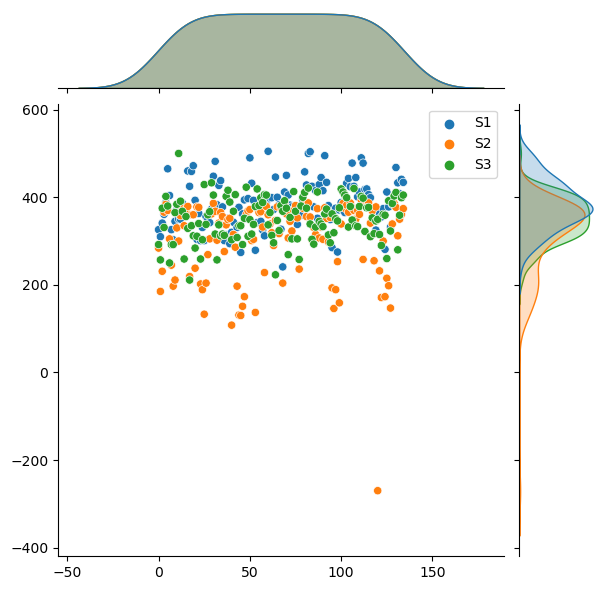

In [34]:
sns.jointplot(df)

## Plot after dropping outliers

<AxesSubplot:title={'center':'Box plot'}>

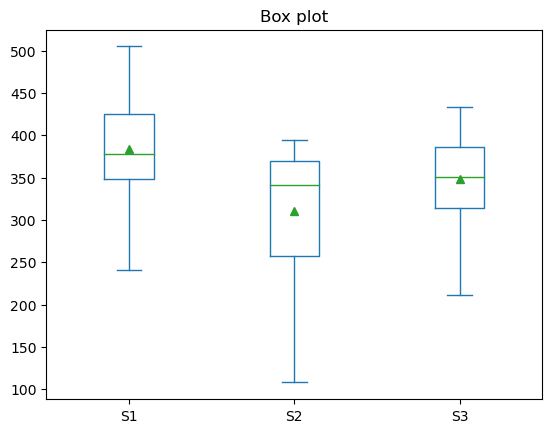

In [154]:
updated_Q1 = Q1.drop([11, 120])
updated_Q1.plot(kind = "box", title = "Box plot", showmeans = True)

# Data Exploration - Q2

    Missing values  % Missing
S1               0        0.0
S2               0        0.0
S3               0        0.0


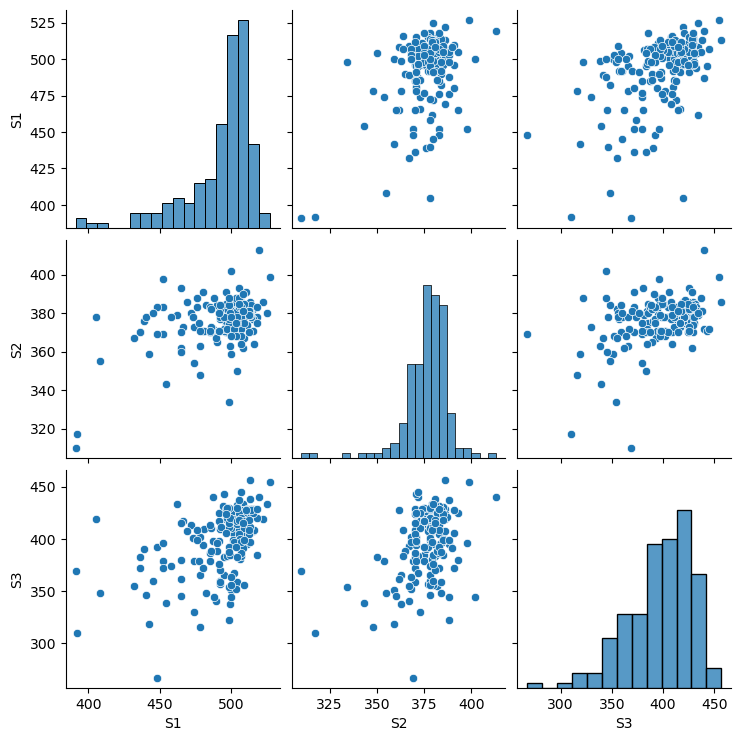

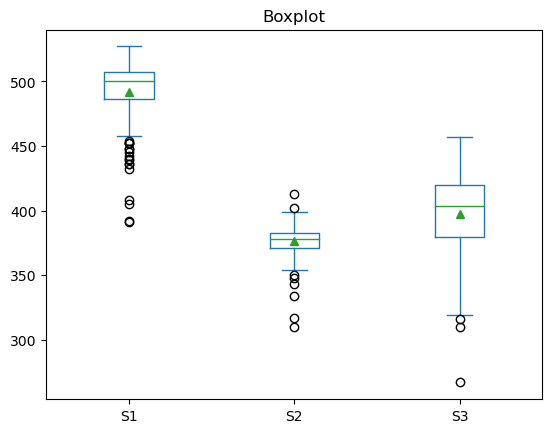

In [37]:
Q2 = pd.read_excel("First set of data.xlsx", sheet_name = "Q2")
missing_values_Q2 = Q2.isnull().sum().sort_values(ascending=False)
percentage_missing_values_Q2 = (missing_values_Q2/len(Q2))*100
Check_missing_values_Q2 = pd.concat([missing_values_Q2, percentage_missing_values_Q2], axis=1, keys= ['Missing values', '% Missing'])
print(Check_missing_values_Q2)

sns.pairplot(Q2)

boxplot_Q2 = Q2.plot(kind = "box", title = "Boxplot", showmeans=True)

<AxesSubplot:>

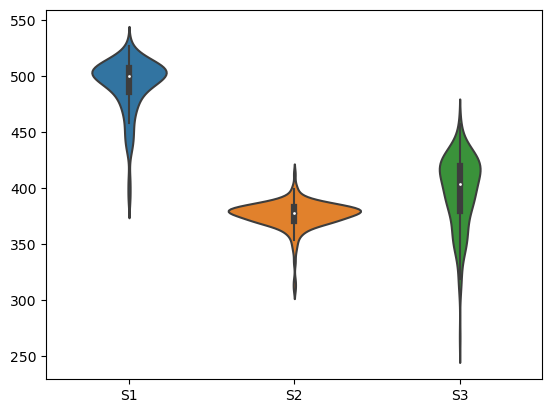

In [38]:
sns.violinplot(Q2)

Text(0.5, 1.0, 'Correlation Heatmap')

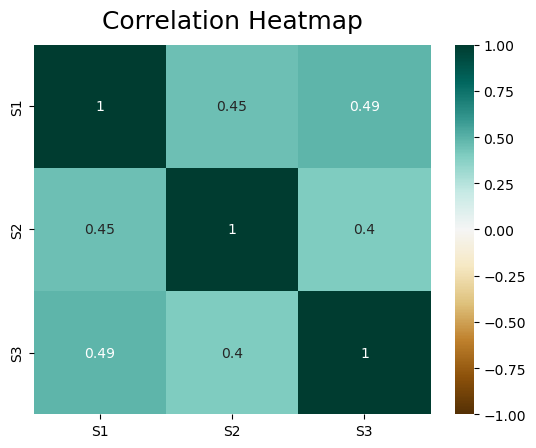

In [39]:
heatmap_Q2 = sns.heatmap(Q2.corr(),vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap_Q2.set_title('Correlation Heatmap', fontdict={'fontsize': 18}, pad=12)

# Data exploration - Q3

    Missing values  % Missing
S1               0        0.0
S2               0        0.0
S3               0        0.0


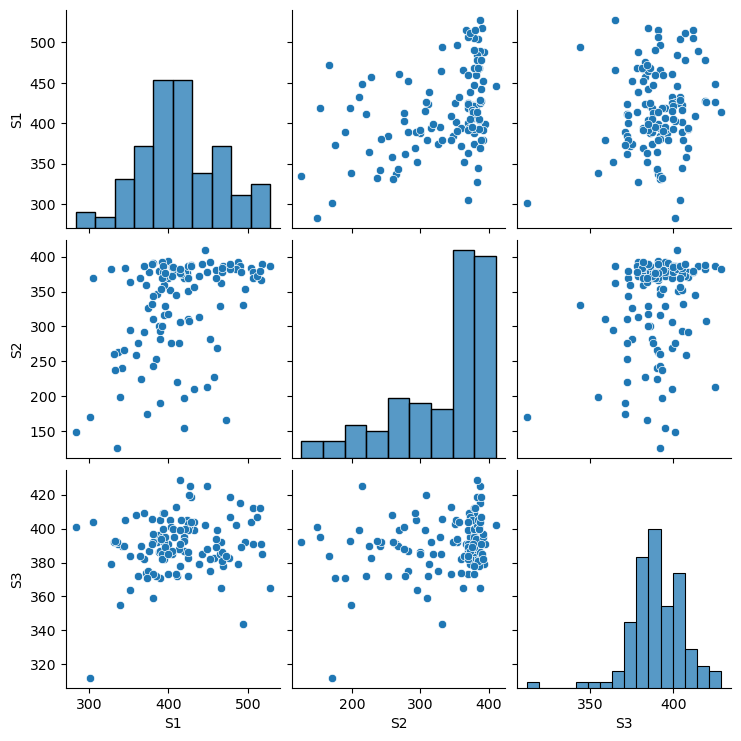

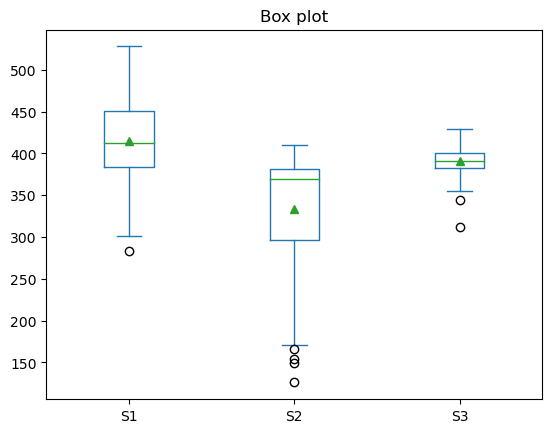

In [40]:
Q3 = pd.read_excel("First set of data.xlsx", sheet_name = "Q3")
Q3.describe()
missing_values_Q3 = Q3.isnull().sum().sort_values(ascending=False)
percentage_missing_values_Q3 = (missing_values_Q3/len(Q2))*100
Check_missing_values_Q3 = pd.concat([missing_values_Q3, percentage_missing_values_Q3], axis=1, keys= ['Missing values', '% Missing'])
print(Check_missing_values_Q3)

sns.pairplot(Q3)
boxplot = Q3.plot(kind = "box", title = "Box plot", showmeans = True)

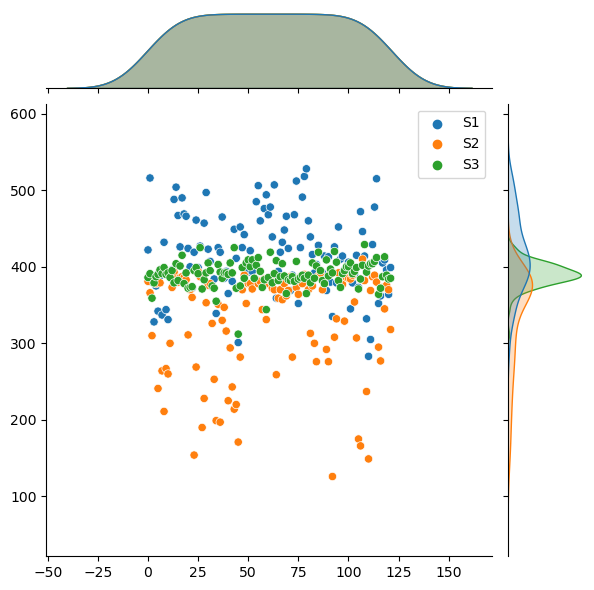

In [118]:
sns.jointplot(Q3)

<AxesSubplot:>

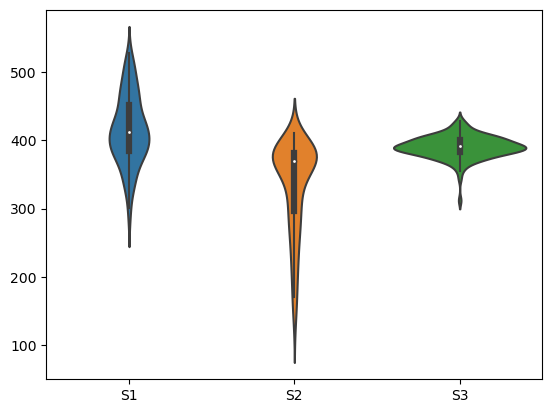

In [119]:
sns.violinplot(Q3)

Text(0.5, 1.0, 'Correlation Heatmap')

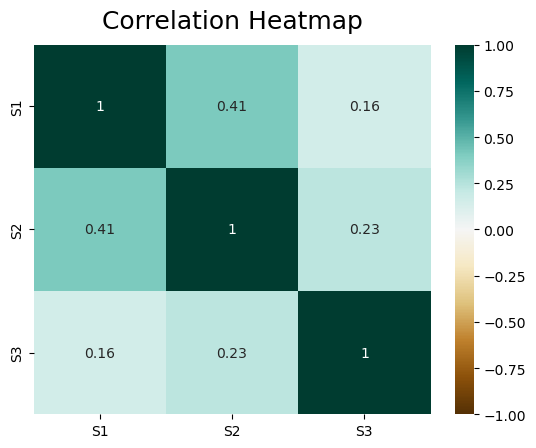

In [120]:
heatmap_Q3 = sns.heatmap(Q3.corr(), vmin = -1, vmax = 1, annot = True, cmap = "BrBG")
heatmap_Q3.set_title("Correlation Heatmap", fontdict = {"fontsize":18}, pad = 12)

# Data exploration - Q4

[ True  True False]
     S1   S2    S3
98  371  179  364'


<AxesSubplot:title={'center':'Box Plot'}>

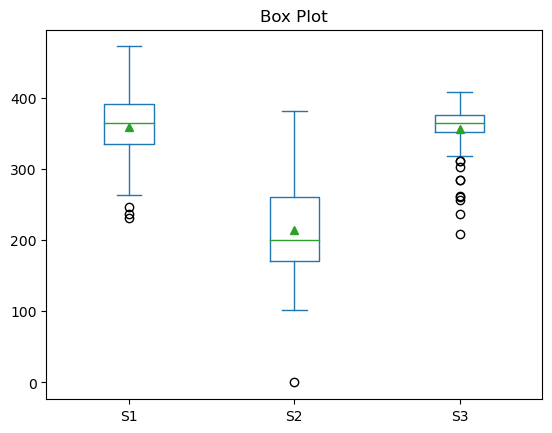

In [41]:
Q4 = pd.read_excel("First set of data.xlsx", sheet_name = "Q4")

# determine whether a column/variable is numeric or not in
is_number = np.vectorize(lambda x: np.issubdtype(x, np.number))
print(is_number(Q4.dtypes))

# Find exact location of non-numeric data
print(Q4[~Q4.applymap(np.isreal).all(1)])

# Edit data
Q4.at[98, "S3"] = 364

# Transform the whole column into numeric data
Q4 = Q4.apply(pd.to_numeric, errors="coerce")

Q4.plot(kind = "box", title = "Box Plot", showmeans = True)

    Missing values  % Missing
S1               0        0.0
S2               0        0.0
S3               0        0.0


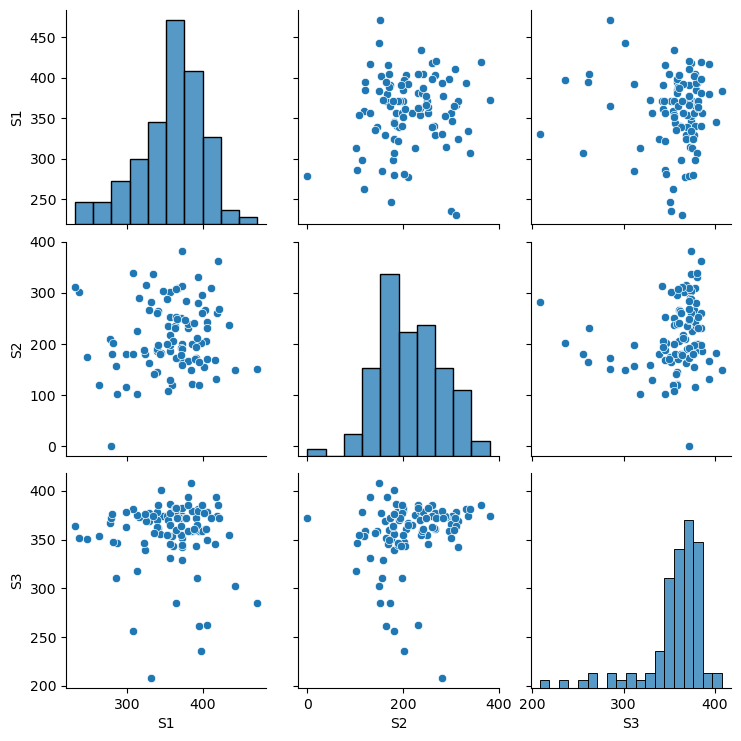

In [42]:
Missing_values_Q4 = Q4.isnull().sum().sort_values(ascending = False)
Percentage_missing_values_Q4 = Missing_values_Q4/len(Q4)*100
Check_missing_values_Q4 = pd.concat([Missing_values_Q4, Percentage_missing_values_Q4], axis=1, keys= ['Missing values', '% Missing'])
print(Check_missing_values_Q4)

sns.pairplot(Q4)

<AxesSubplot:>

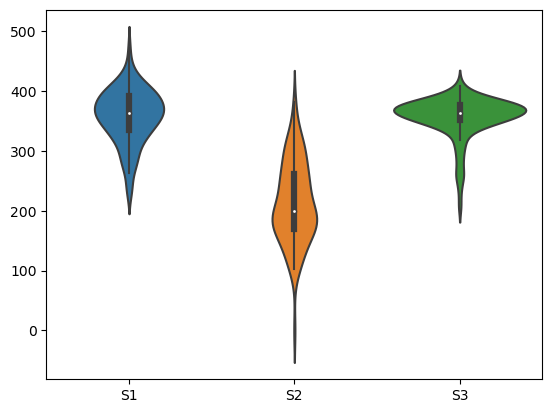

In [200]:
sns.violinplot(Q4)

Text(0.5, 1.0, 'Heatmap Correlation')

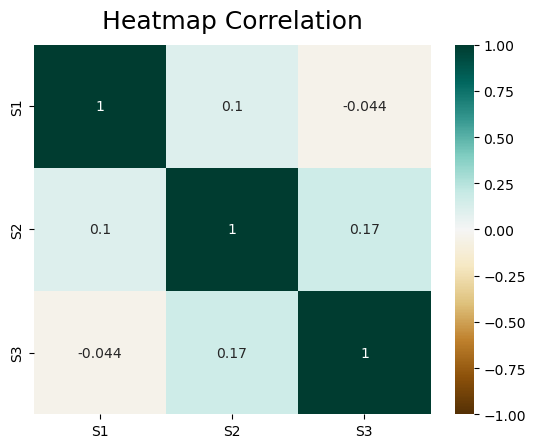

In [201]:
heatmap_Q4 = sns.heatmap(Q4.corr(), vmin = -1, vmax = 1, annot = True, cmap = "BrBG")
heatmap_Q4.set_title("Heatmap Correlation", fontdict = {"fontsize":18}, pad = 12)

# Data exploration - Q5

In [116]:
"""
Boolean values, such as "TRUE" and "FALSE", are represented as True and False in Python, 
which correspond to the integer values 1 and 0, respectively. 
When reading the Excel file, pandas converts the boolean values to their corresponding integer representations.
"""
Q5 = pd.read_excel("First set of data.xlsx", sheet_name = "Q5")

# determine whether a column/variable is numeric or not in
is_number = np.vectorize(lambda x: np.issubdtype(x, np.number))
print(is_number(Q5.dtypes))


# Find exact location of non-numeric data
print(Q5[~Q5.applymap(np.isreal).all(1)])

# Edit data
Q5.at[142, "S1"] = 425

# Transform the whole column into numeric data
Q5 = Q5.apply(pd.to_numeric, errors="coerce")

[False  True  True]
       S1   S2   S3
142  425'  274  383


## Imputation of missing values

In [117]:
missing_values_Q5 = Q5.isnull().sum().sort_values(ascending = False)
percentage_missing_values_Q5 = missing_values_Q5/len(Q5)*100
check_missing_values_Q5 = pd.concat([missing_values_Q5, percentage_missing_values_Q5], axis = 1, keys= ['Missing values', '% Missing'])
print(check_missing_values_Q5)

# Locate the index of null values
print(Q5[Q5['S1'].isnull()].index.tolist())


Q5 = Q5.interpolate()
print(Q5.isnull().sum())

    Missing values  % Missing
S1               2   1.342282
S2               0   0.000000
S3               0   0.000000
[9, 25]
S1    0
S2    0
S3    0
dtype: int64


## Outliers Detection

In [126]:
Q1_ = Q5.quantile(0.25)
Q3_ = Q5.quantile(0.75)
IQR_ = Q3_ - Q1_

lower_bound = Q1_ - 1.5 * IQR_
upper_bound = Q3_ + 1.5 * IQR_

outliers_S1 = Q5[(Q5['S1'] < lower_bound['S1']) | (Q5['S1'] > upper_bound['S1'])]
outliers_S2 = Q5[(Q5['S2'] < lower_bound['S2']) | (Q5['S2'] > upper_bound['S2'])]
outliers_S3 = Q5[(Q5['S3'] < lower_bound['S3']) | (Q5['S3'] > upper_bound['S3'])]

print(pd.concat([lower_bound, upper_bound], axis=1, keys= ['Lower Bound', 'Upper Bound']))

print(pd.concat([outliers_S1, outliers_S2, outliers_S3], axis=0, keys= ['outliers_S1', 'outliers_S3', "outliers_S3"]))

    Lower Bound  Upper Bound
S1        263.5        539.5
S2         23.5        467.5
S3        302.5        466.5
                    S1   S2    S3
outliers_S1 3    263.0  131   362
            6    262.0  179   368
            36   247.0  102   289
            76   548.0  387   425
outliers_S3 9    323.5  220     1
            11   337.0  150   272
            36   247.0  102   289
            66   400.0  162   293
            130  485.0  383  4100
            133  451.0  257   255


<AxesSubplot:title={'center':'Box Plot'}>

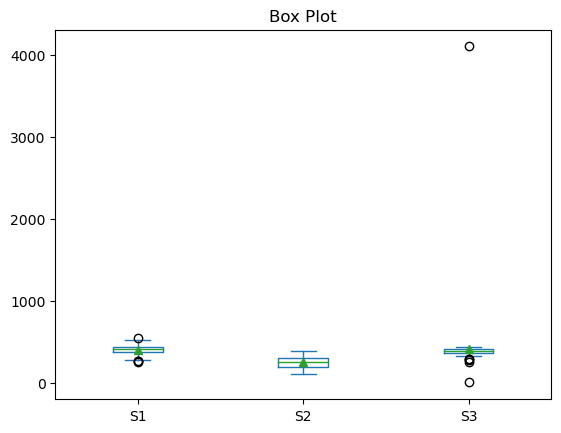

In [128]:
Q5.plot(kind = "box", title = "Box Plot", showmeans = True)

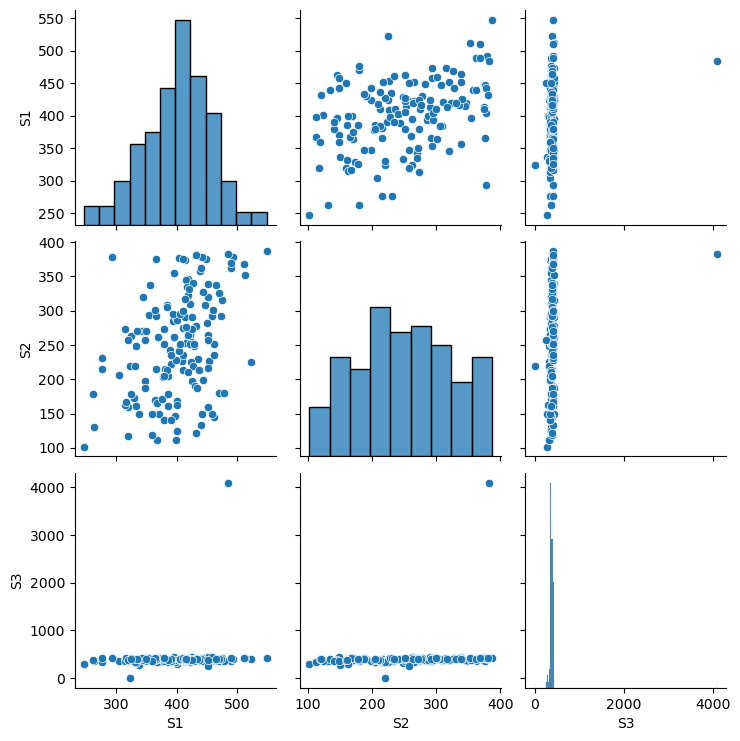

In [83]:
sns.pairplot(Q5)

<AxesSubplot:>

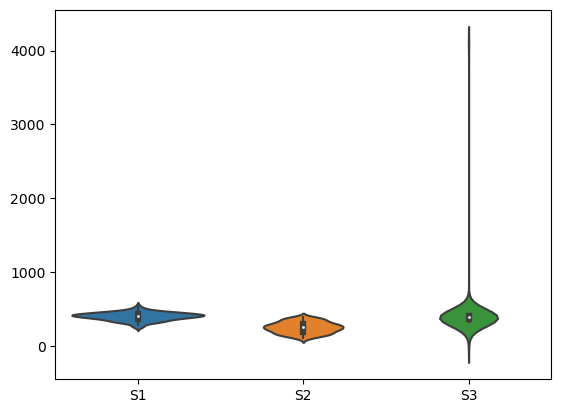

In [125]:
sns.violinplot(Q5)

## Plot after drop outliers

<Figure size 800x600 with 0 Axes>

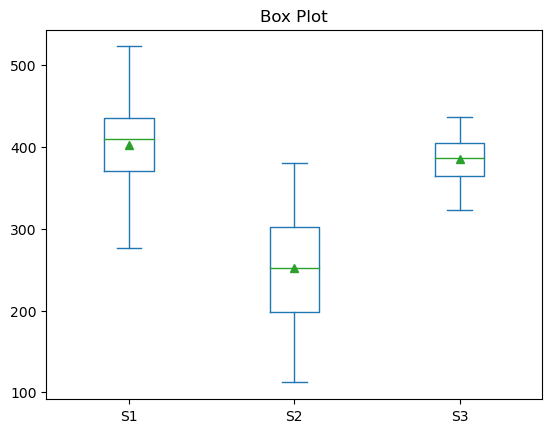

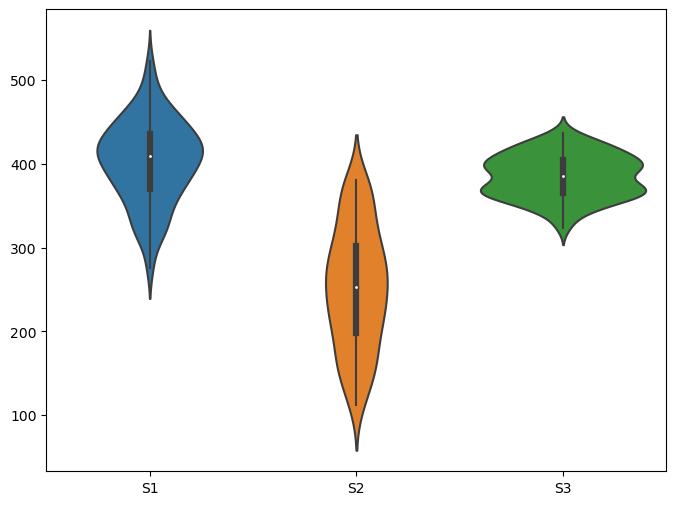

In [132]:
update_df = Q5.drop([3,6,36,76,9,11,66,130,133])
plt.figure(figsize=(8, 6))
update_df.plot(kind = "box", title = "Box Plot", showmeans = True)
plt.show()

plt.figure(figsize=(8, 6))
sns.violinplot(update_df)
plt.show()